In [1]:
# The Necessary libraries 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score
from sklearn.linear_model import LogisticRegression

In [2]:
df = pd.read_csv('/data_sets/Fake_News.csv')
df.head(10)

,title,news_url,source_domain,tweet_num,real
0,Kandi Burruss Explodes Over Rape Accusation on...,http://toofab.com/2017/05/08/real-housewives-a...,toofab.com,42,1
1,People's Choice Awards 2018: The best red carp...,https://www.today.com/style/see-people-s-choic...,www.today.com,0,1
2,Sophia Bush Sends Sweet Birthday Message to 'O...,https://www.etonline.com/news/220806_sophia_bu...,www.etonline.com,63,1
3,Colombian singer Maluma sparks rumours of inap...,https://www.dailymail.co.uk/news/article-33655...,www.dailymail.co.uk,20,1
4,Gossip Girl 10 Years Later: How Upper East Sid...,https://www.zerchoo.com/entertainment/gossip-g...,www.zerchoo.com,38,1
5,Gwen Stefani Got Dumped by Blake Shelton Over ...,www.intouchweekly.com/posts/gwen-stefani-dumpe...,www.intouchweekly.com,45,0
6,Broward County Sheriff Fired For Lying About P...,https://yournewswire.com/broward-county-sherif...,yournewswire.com,124,0
7,Amber Rose Shuts Down French Montana Dating Ru...,www.etonline.com/news/214798_amber_rose_shuts_...,www.etonline.com,4,0
8,Mindy Kaling makes first post-baby appearance ...,https://www.aol.com/article/entertainment/2018...,www.aol.com,59,1
9,Katharine McPhee Butchers Tony Nominations: “I...,https://www.98online.com/2018/05/02/katharine-...,www.98online.com,10,1


In [3]:
df.shape

(23196, 5)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23196 entries, 0 to 23195
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   title          23196 non-null  object
 1   news_url       22866 non-null  object
 2   source_domain  22866 non-null  object
 3   tweet_num      23196 non-null  int64 
 4   real           23196 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 906.2+ KB


In [5]:
df.columns

Index(['title', 'news_url', 'source_domain', 'tweet_num', 'real'], dtype='object')

In [6]:
# I will change the names of the lost column for clarity 
df = df.rename(columns = {'real' : 'outcome'})

**What each feature mean**
1. **title:** The name of the news or headline
2. **news_url:** is a link to the news page
3. **source_domain:** the sites domain 
4. **tweet_num:** is the number of tweets the news accumulated.
5. **outcome:*** updated name, tells if the news is real(1) or fake(0)

In [7]:
# check for null values
df.isnull().sum()

title              0
news_url         330
source_domain    330
tweet_num          0
outcome            0
dtype: int64

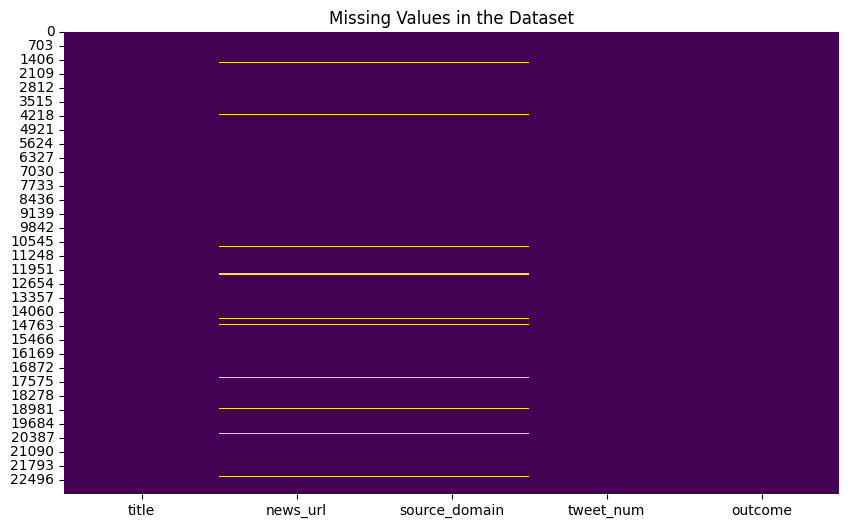

In [8]:
# proportion of missing values
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cmap='viridis', cbar=False)
plt.title('Missing Values in the Dataset')
plt.show()

In [9]:
# we can fill the missing values with placeholder 
df = df.fillna('unknown')

In [10]:
df['outcome'].value_counts()

outcome
1    17441
0     5755
Name: count, dtype: int64

<Axes: xlabel='outcome', ylabel='count'>

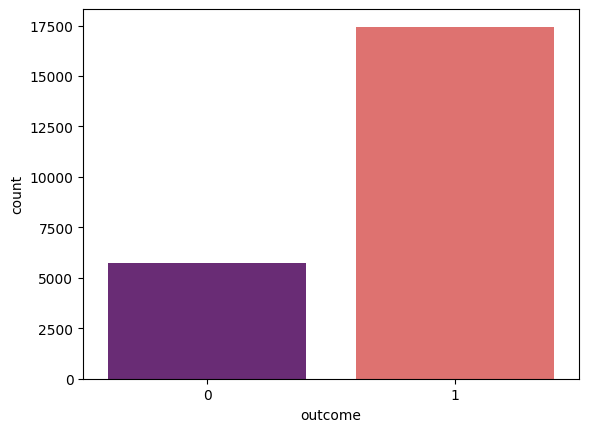

In [11]:
sns.countplot(data = df, x = 'outcome', palette = 'magma' )

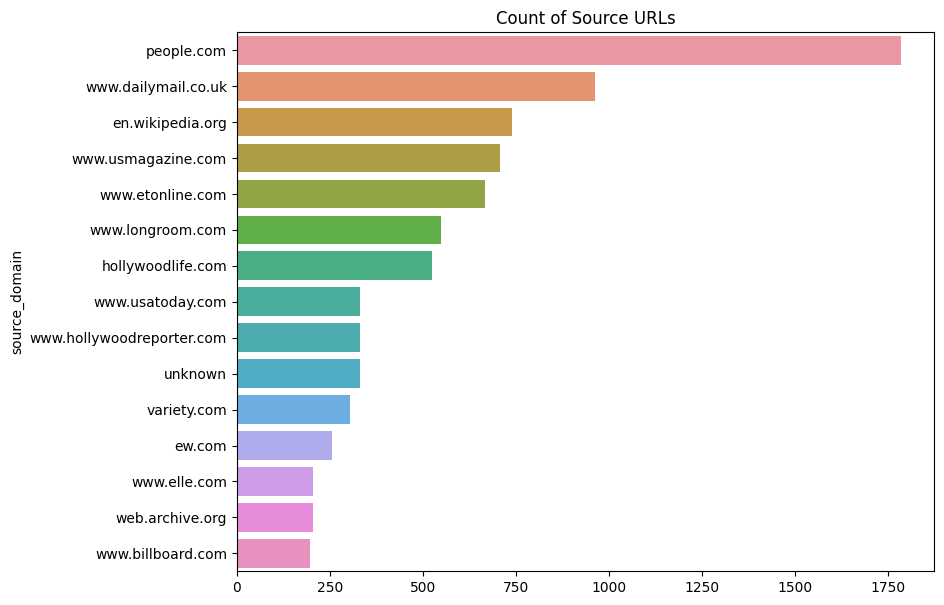

In [12]:
k=df['source_domain'].value_counts()
# the first 15 source urls
k=k[:15]
plt.figure(figsize=(9, 7))
sns.barplot(y=k.index,x=k.values)
plt.title('Count of Source URLs')
plt.show()

# DATA PREPROCESSING

For this project, i will choose the most most import feature, that is, "title and outcome"

In [13]:
df = df[['title', 'outcome']]

In [14]:
df.columns

Index(['title', 'outcome'], dtype='object')

In [15]:
import re
# to remove all unnecessa charadters

def remove_non_letters(text):
    # to keep only letters
    clean_text = re.sub(r'[^a-zA-Z]', ' ', text)
    
    # remove extra spaces
    clean_text = ' '.join(clean_text.split())
    return clean_text

In [16]:
df['title'] = df['title'].apply(remove_non_letters)

In [17]:
# split the data set
X = df['title']
y = df['outcome']

# FIT A MODEL

In [18]:
# split the data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123)

# TFIDF

In [19]:
# implement a pipeline with tfdif
clf = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('naive_bayes', MultinomialNB())
    ])

In [20]:
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.30      0.45      1137
           1       0.81      0.98      0.89      3503

    accuracy                           0.82      4640
   macro avg       0.84      0.64      0.67      4640
weighted avg       0.82      0.82      0.78      4640



# LOGISTIC REGRESSION 

In [21]:
clf = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('logistic_rgression', LogisticRegression())
    ])

In [22]:
clf.fit(X_train, y_train)
pred = clf.predict(X_test)

In [23]:
accuracy_score(y_test, pred)

0.8446120689655172